# PPCA and Extensions Demos
We apply our implementation of the PPCA (Eigen), PPCA (EM), MPPCA algorithms outline by Tipping and Bishop to various synthetic and real datasets to demonstrate their advantages and draw comparisons.

## Missing Data
In `missing_data.py` we compare classical PCA to our 2 probabilistic PCA implementations for reconstruction error in settings with missing data. We wish to demonstrate that the probabilistic formulation is more robust to missing data and can reduce reconstruction error in these settings.

In this example we:
1. Generate 3 dimensional data with some noise
2. Remove various fractions of the data at random
3. Reconstruct the missing values using classical PCA and our PPCA implementations
4. Compare the MSE of reconstruction on missing entries
5. Visualize the original data and reconstructions.

In [7]:
import os

#print cureent working directory
print(os.getcwd())

#back out one level
os.chdir("..")

print(os.getcwd())

/Users/michaelmontemurri/Desktop/Classes/IFT 6269 - Probabilistic Graphical Models/Project/Code/scripts
/Users/michaelmontemurri/Desktop/Classes/IFT 6269 - Probabilistic Graphical Models/Project/Code


Missing ratio: 1.0%
Reconstruction MSE on missing entries:
  PCA:            94.2707
  PPCA (Eigen):   94.0803
  PPCA (EM):      94.2688
--------------------------------------------------


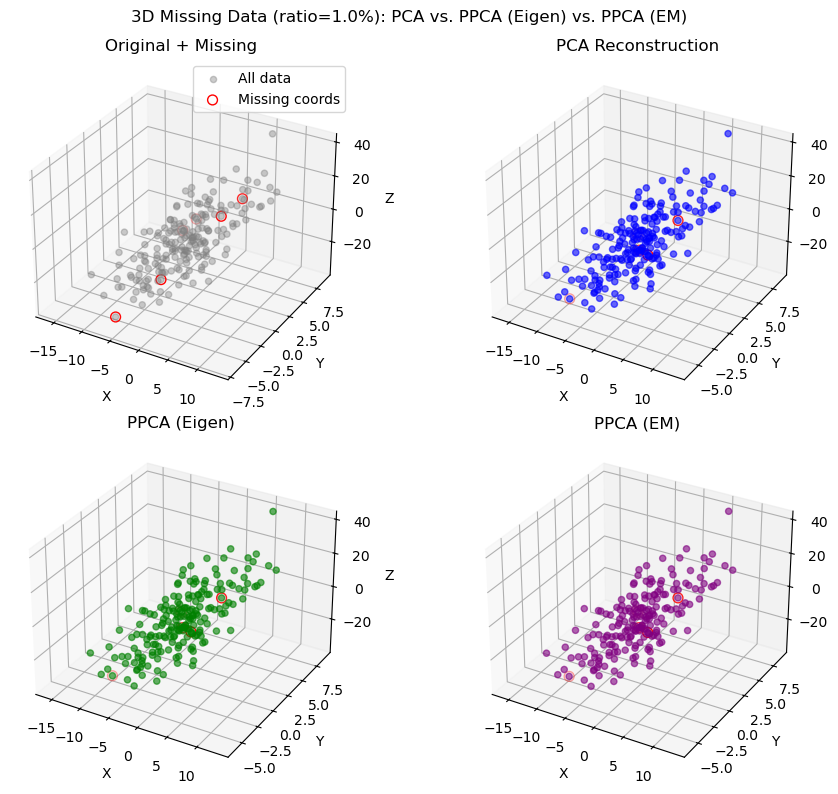

Missing ratio: 5.0%
Reconstruction MSE on missing entries:
  PCA:            95.1786
  PPCA (Eigen):   93.8401
  PPCA (EM):      95.1441
--------------------------------------------------


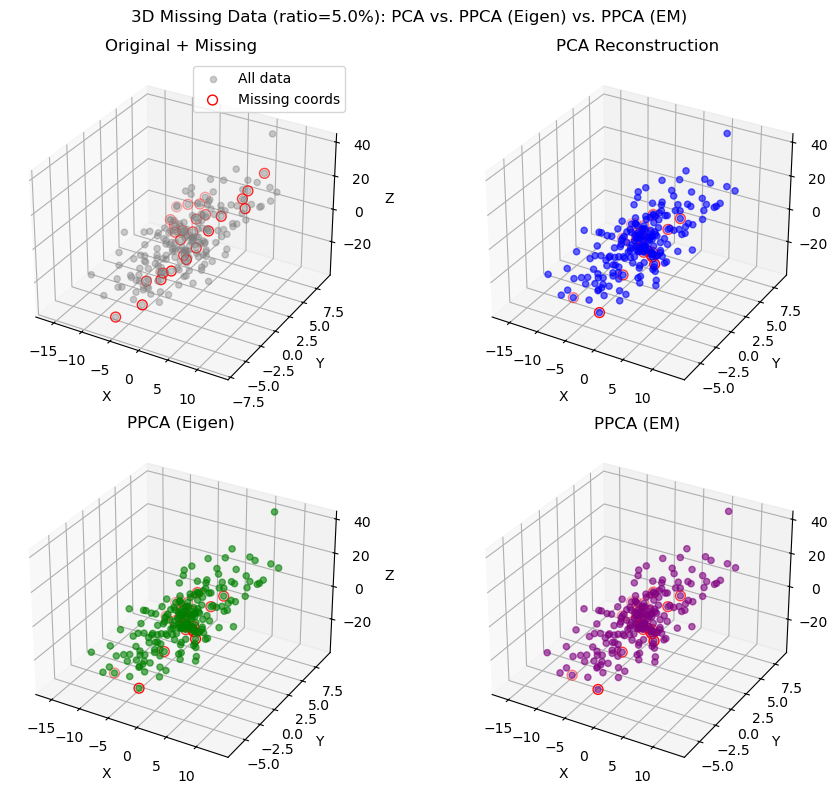

Missing ratio: 10.0%
Reconstruction MSE on missing entries:
  PCA:            77.1847
  PPCA (Eigen):   73.8161
  PPCA (EM):      76.8465
--------------------------------------------------


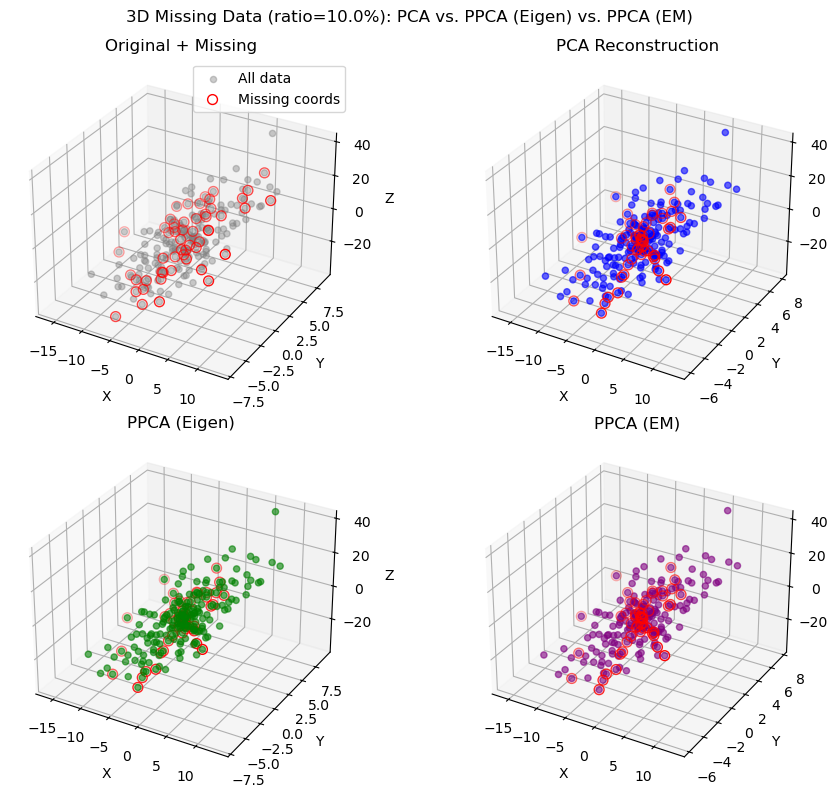

Missing ratio: 25.0%
Reconstruction MSE on missing entries:
  PCA:            69.4342
  PPCA (Eigen):   64.0401
  PPCA (EM):      68.5841
--------------------------------------------------


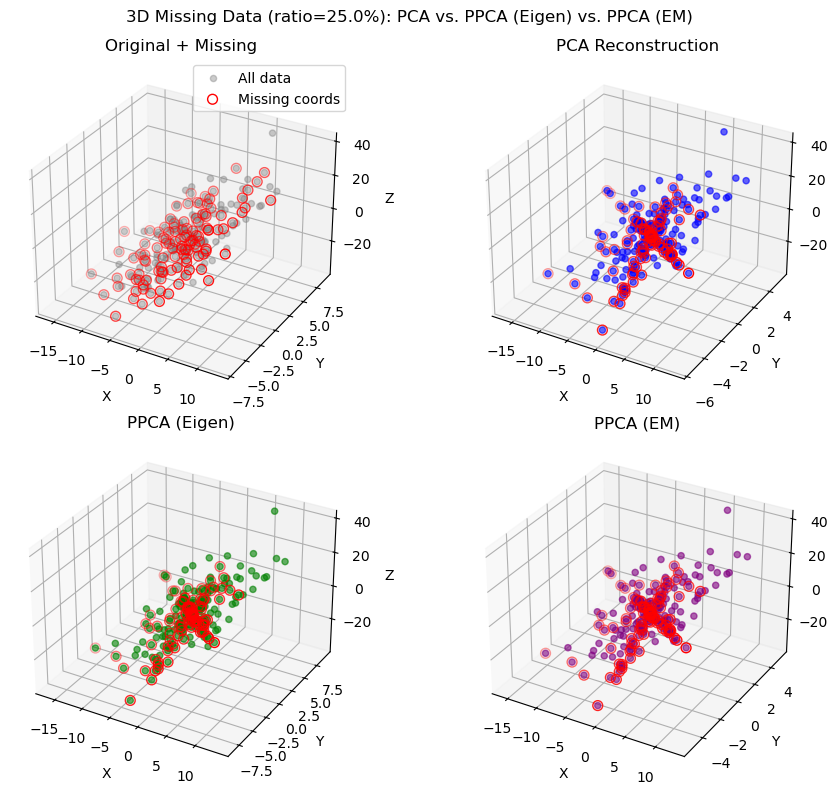

In [9]:
os.chdir("scripts")
import numpy as np
import matplotlib.pyplot as plt
from scripts.missing_data import *
from scripts.algos import PPCAEigen, PPCAEM, MixtureOfPPCA
from sklearn.decomposition import PCA
from numpy.linalg import eigh, inv

# run missing_data demo
missing_data()


### Reconstruction Error: PPCA (Eigen) vs. PPCA (EM) vs. Classical PCA
#### Performance Summary:
PPCA (Eigen) consistently achieves the lowest reconstruction error.
PPCA (EM) performs better than Classical PCA, but not as well as PPCA (Eigen).
Classical PCA shows the highest reconstruction error.
This result demonstrates a key advantage of the probabilistic approach to PCA: the ability to explicitly model noise and missing data.

#### Why Probabilistic PCA Outperforms Classical PCA

PPCA Models Noise Explicitly:


PPCA assumes the observed data arises from a lower-dimensional latent space, with isotropic Gaussian noise added to each observed entry.

-Probabilistic framework allows PPCA to marginalize over the missing data during model fitting, leveraging the full structure of the observed data.

In contrast, Classical PCA:

-Either imputes missing entries (typically using column means) or ignores them in covariance estimation.

-Does not explicitly account for uncertainty due to missing data, leading to less robust reconstructions.

##### PPCA (Eigen) vs. Classical PCA:

The Eigen-decomposition approach to PPCA uses observed data to estimate the covariance matrix while marginalizing over missing entries. This allows it to better estimate the latent subspace without being overly influenced by missingness.

Classical PCA, by imputing missing values with column means, pulls missing points closer to the data centroid, reducing variance and resulting in less faithful reconstructions.

### Degenerate Subspace Collapse at High Missingness
#### Emergence of Cross-like Shapes:

At high percentages of missing data, the reconstructions tend to align along major axes, forming axis-aligned crosses. This happens because:

-The missing entries in many data points are imputed with similar values (e.g., means or projections into the latent subspace), reducing variation along certain directions.

-The model focuses on reconstructing the dominant observed variation, leading to oversimplified reconstructions.

#### Collapse to a Line for PPCA (EM):

When the missing data exceeds 50%, PPCA (EM) collapses to a single direction of variation:
The EM algorithm iteratively imputes missing data based on the current latent subspace. With insufficient constraints (due to too much missing data), the updates can converge to a degenerate solution.
This happens because the algorithm cannot reliably distinguish between higher-dimensional structure and noise, favoring a trivial 1D solution.

#### Why PPCA (Eigen) is More Robust:

The Eigen-decomposition approach avoids direct iterative imputation, instead marginalizing over missing entries during covariance estimation.
By estimating the subspace directly from the observed data (without iterative imputation), PPCA (Eigen) is less likely to converge to a degenerate subspace, maintaining robustness even with high missingness.

#### Classical PCA’s Collapse:

Similar to PPCA (EM), Classical PCA is vulnerable to degenerate solutions at high missingness because it imputes missing entries with column means:
This reduces variation in the imputed data, skewing the covariance estimation and resulting in simplistic reconstructions.


## Clustering

We wish to visually demonstrate the advantages of the Mixture PPCA model that allows for multiple local solutions compared to Classical PCA which yields a single, global solution. 

In this example, we generate 3 dimensional ellipsoidal clusters (heterogeneous 3d data), and visualize the global PCA solution versus the local MPPCA solutions.


===== Reconstruction MSE =====
PCA (global subspace): 0.4970
MPPCA (local subspaces): 0.0006


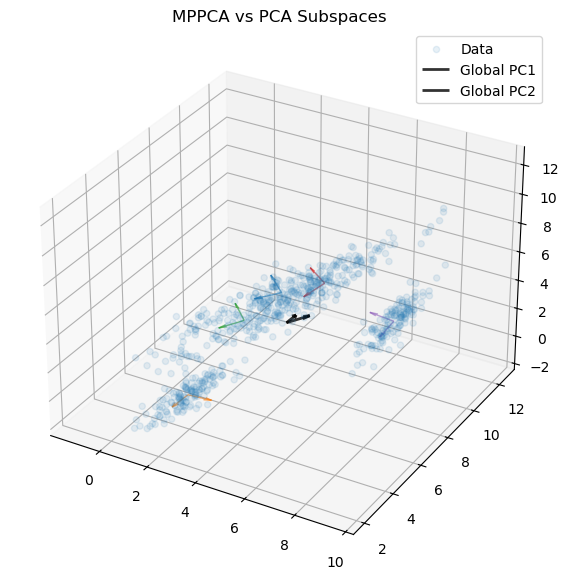

In [11]:
from scripts.clusters import *

# run clusters demo
cluster_demo()

This is a simple yet effective demonstration of how the MPPCA approach can significantly improve what was previously a significant challenge for classical PCA.

## Image Reconstruction

We wish to re-produce a similar example to that in Tipping and Bishops paper demonstrating the advantage of MPPCA on reconstructing images with greater detail at the same bit-rate. This demo shows how local clustering can be advantagous for heterogeneous images

In this demo, we take a grayscale image and reconstruct it using classical PCA, PPCA (Eigen), PPCA (EM) and MPPCA.

### Data Preparation:

A grayscale version of the "chelsea cat" image is resized to 128×128 for computational efficiency.
The image is divided into non-overlapping patches of size 8×8, each flattened into a 64-dimensional vector.
These patches are used as the input data for the models.

### Model Parameters:

-The latent dimensionality (q) is set to 10, reducing the original 64-dimensional patch vectors to a 10-dimensional representation.

-For MPPCA, 4 mixture components are used to allow the model to adapt to different regions of the image.
Reconstruction:

Each model reconstructs the image by transforming the compressed latent representation back into the original patch space.

The reconstructed patches are then reassembled into a full image. Overlapping patches are averaged in overlapping regions.

Extracted 256 patches from image of size (128, 128).


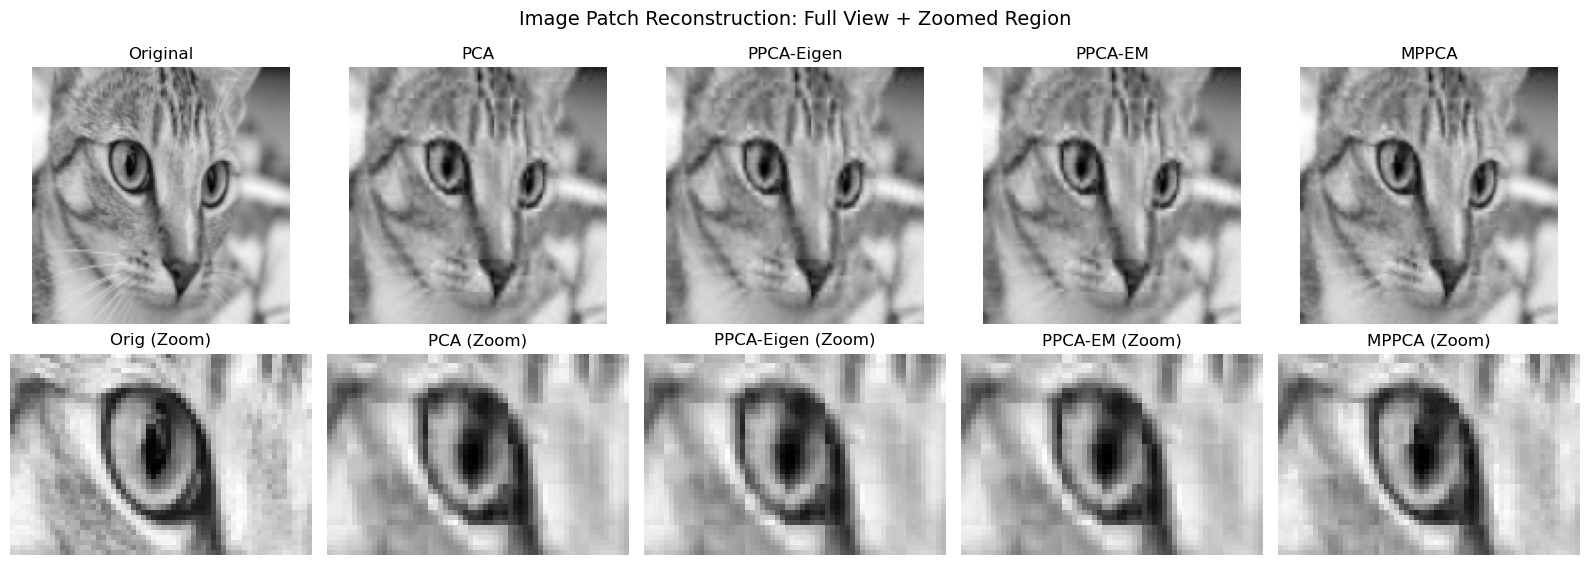

In [12]:
from scripts.img_reconstruct import image_reconstruction

# run image reconstruction demo
image_reconstruction()

### Results:

The reconstruction results clearly show that MPPCA captures finer details in the reconstructed image compared to other methods. This improvement is evident in regions with high variability, where the localized modeling of MPPCA provides an advantage over the global subspace used by PCA.

While the bit-rate of PCA and MPPCA are nearly the same, MPPCA introduces a slightly higher overhead due to the need to store additional model parameters, such as: mixture weights, cluster means, cluster covariances.
However, this additional overhead is negligible relative to the overall data representation cost, making MPPCA a significantly more efficient and effective approach for heterogeneous images.

## PPCA (Eigen) vs. PPCA (EM) 

While we have analytical soultions for the ML parameter estimates via the eigen decomposition of the sample covariance matrix, Tipping and Bishop show that the EM appraoch can be computationally advantageous in extremely high dimensional settings. They show that the eigen decomp approach is O(...) whereas the EM approach can be structured to be O(...).

In this demo, we run both approaches to PPCA on synthetic data with varying d and compare runtimes.

d=50, PPCA(Eigen) time=1.188s, PPCA(EM) time=4.155s
d=200, PPCA(Eigen) time=19.733s, PPCA(EM) time=35.270s
d=400, PPCA(Eigen) time=105.323s, PPCA(EM) time=90.021s


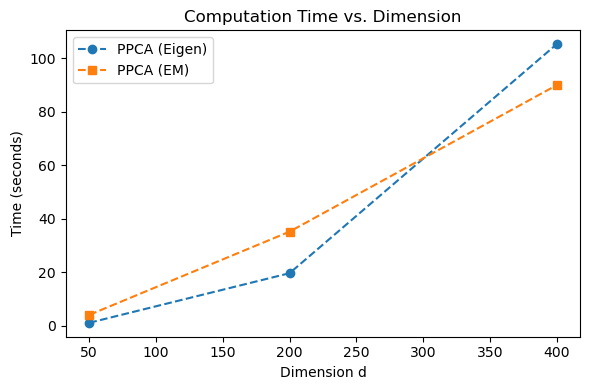

In [13]:
from scripts.ppca_comparison import ppca_comparison

# run PPCA comparison demo
ppca_comparison()

We stop at d=400 for the sake of time, but the point is clearly demonstrated.